In [1]:
import glob
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
print("stock data")

dataset_size = []
null_count = []
zero_volume_ratio = []
avg_volume = []
volume_std = []

latest_date:dict[str, int] = {}


for file in glob.glob("../data/stock/*.csv"):
    
    df = pl.read_csv(file)

    if ("Volume" not in df.columns) or ("Close" not in df.columns):

        print(f"Skipping {file} due to missing 'Volume' or 'Close' columns.")
        continue

    if df["Volume"].mean() == 0:

        print(f"Skipping {file} due to zero mean volume.")
        continue

    if df["Date"][-1] not in latest_date:

        latest_date[df["Date"][-1]] = 1
    
    else:

        latest_date[df["Date"][-1]] += 1
    
    dataset_size.append(df.shape[0])
    null_count.append(df["Close"].null_count())
    zero_volume_ratio.append(df.filter(pl.col("Volume") == 0).shape[0] / df.shape[0])
    avg_volume.append(df["Volume"].mean())
    volume_std.append(df["Volume"].std() / df["Volume"].mean())

stock data
Skipping ../data/stock/9388.csv due to zero mean volume.


In [3]:
ref = pl.read_csv("../resources/all_stock.csv").filter(pl.col("市場") == "東P").select("コード").to_series().to_list()

tp_dataset_size = []
tp_null_count = []
tp_zero_volume_ratio = []
tp_avg_volume = []
tp_volume_std = []


for symbol in ref:

    try:

        df = pl.read_csv(f"../data/stock/{symbol}.csv")

        tp_dataset_size.append(df.shape[0])
        tp_null_count.append(df["Close"].null_count())
        tp_zero_volume_ratio.append(df.filter(pl.col("Volume") == 0).shape[0] / df.shape[0])
        tp_avg_volume.append(df["Volume"].mean())
        tp_volume_std.append(df["Volume"].std() / df["Volume"].mean())

    except FileNotFoundError:

        continue

dataset size range: 6 - 6552
null count range: 0 - 3
zero volume ratio range: 0.0 - 0.9990574929311969
average volume range: 0.0942507068803016 - 1288050832.3091393
volume std dev range: 0.4540410835329408 - 46.24814291807269


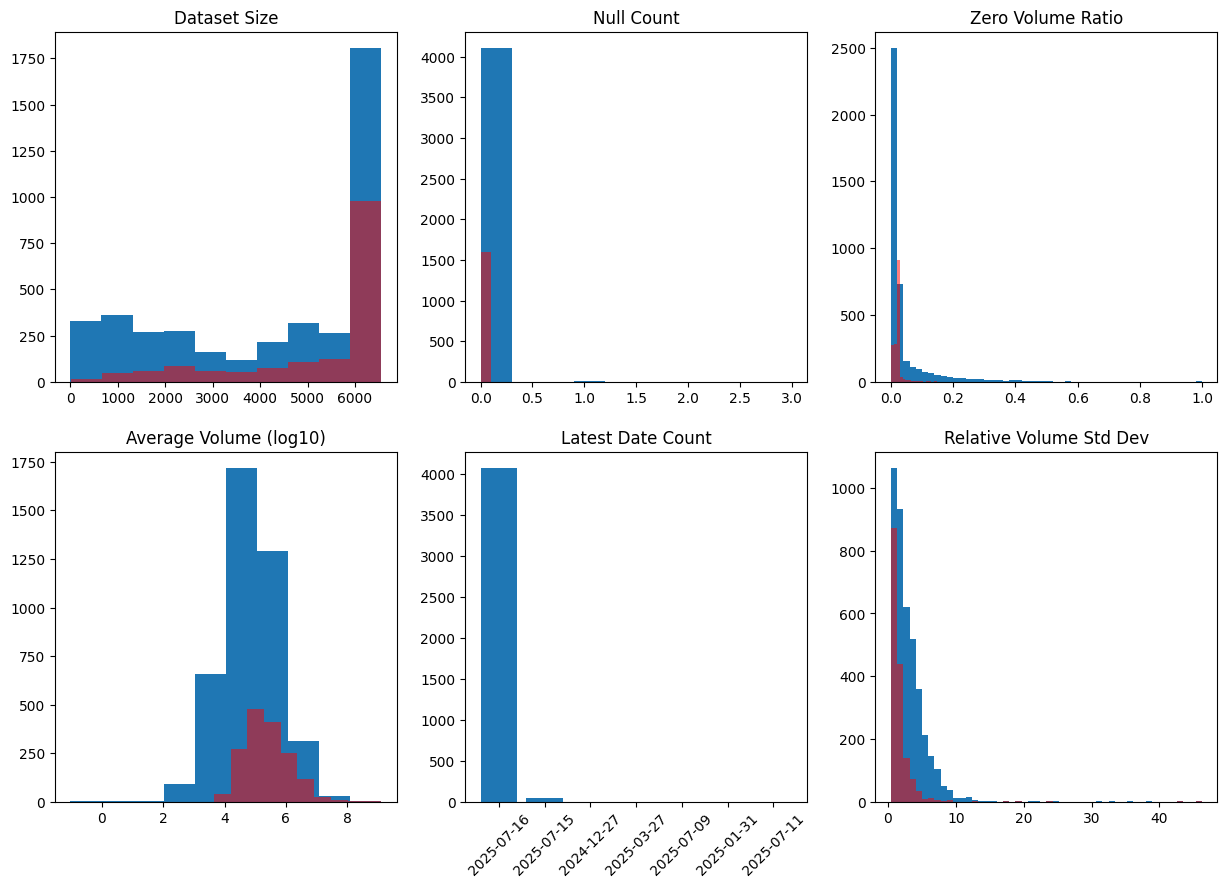

In [4]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs[0, 0].hist(dataset_size)
axs[0, 0].hist(tp_dataset_size, alpha=0.5, color = "red")
axs[0, 0].set_title("Dataset Size")

axs[0, 1].hist(null_count, align = "mid")
axs[0, 1].hist(tp_null_count, alpha=0.5, color = "red", align = "mid")
axs[0, 1].set_title("Null Count")

axs[0, 2].hist(zero_volume_ratio, bins = 50)
axs[0, 2].hist(tp_zero_volume_ratio, alpha=0.5, color = "red", bins = 50)
axs[0, 2].set_title("Zero Volume Ratio")

axs[1, 0].hist(np.log10(avg_volume))
axs[1, 0].hist(np.log10(tp_avg_volume), alpha=0.5, color = "red")
axs[1, 0].set_title("Average Volume (log10)")

dates = [re.search(r"\d{4}-\d{2}-\d{2}", date).group(0) for date in latest_date.keys()]
axs[1, 1].bar(range(len(latest_date)), latest_date.values())
axs[1, 1].set_xticks(range(len(latest_date)))
axs[1, 1].set_xticklabels(dates, rotation=45)
axs[1, 1].set_title("Latest Date Count")

axs[1, 2].hist(volume_std, bins = 50)
axs[1, 2].hist(tp_volume_std, alpha=0.5, color = "red", bins = 50)
axs[1, 2].set_title("Relative Volume Std Dev")

print(f"dataset size range: {min(dataset_size)} - {max(dataset_size)}")
print(f"null count range: {min(null_count)} - {max(null_count)}")
print(f"zero volume ratio range: {min(zero_volume_ratio)} - {max(zero_volume_ratio)}")
print(f"average volume range: {min(avg_volume)} - {max(avg_volume)}")
print(f"volume std dev range: {min(volume_std)} - {max(volume_std)}")

In [24]:
print("trust data")

dataset_size = []
null_count = []

latest_date:dict[str, int] = {}

for file in glob.glob("../data/trust/*.csv"):
    
    df = pl.read_csv(file)

    if "基準価額(円)" not in df.columns:

        print(f"Skipping {file} due to missing '基準価格' columns.")
        continue

    if df["年月日"][-1] not in latest_date:

        latest_date[df["年月日"][-1]] = 1
    
    else:

        latest_date[df["年月日"][-1]] += 1
    
    dataset_size.append(df.shape[0])
    null_count.append(df["基準価額(円)"].null_count())

trust data


dataset size range: 13 - 4896
null count range: 0 - 0
latest date count:
{'2025年07月15日': 1429}


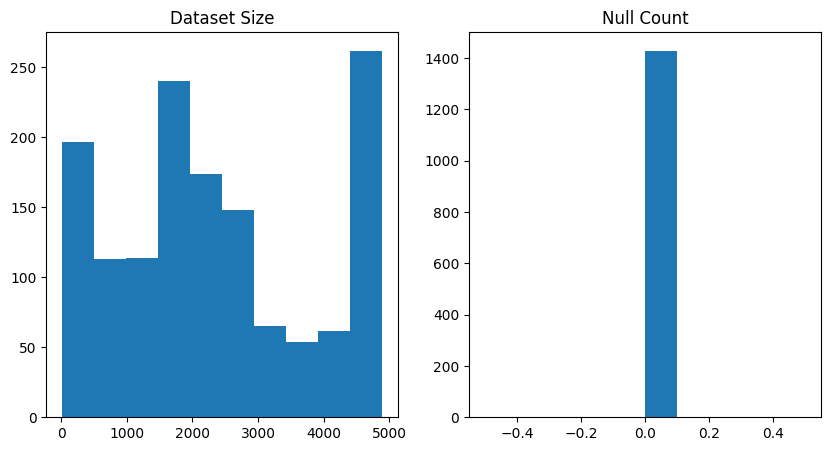

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(dataset_size)
axs[0].set_title("Dataset Size")

axs[1].hist(null_count, align = "mid")
axs[1].set_title("Null Count")

print(f"dataset size range: {min(dataset_size)} - {max(dataset_size)}")
print(f"null count range: {min(null_count)} - {max(null_count)}")
print(f"latest date count:\n{latest_date}")